# Data Exploration

## Importance of Data Visualization

By only looking at some statistics you can miss relevant patterns:

In [1]:
from IPython.display import HTML
HTML('<img src="DinoSequential.gif">')

Maybe you overlook a dinosaur ;)

- Data visualization needs to be adjusted to your data, objectives and audience
- Visuals are being processed faster by the brain than text or plain numbers
- Visuals are committed to long-term memory easier than text
- Visuals can tell stories
- Visuals can reveal patterns, trends, changes, and correlations 
- Visuals can help simplify complex information 
- Visuals can often be more effective than words at changing people’s minds
- Visuals are important for Data Science to:
    - gain first insights of the data
    - to see some patterns
    - for final presentations for the managment

## Different kinds of Data Visuals

- scatter plots
- line plots
- bar plots
- pie charts
- choropleth plots
 - **2D/Planar**
 - **3D/Volumetric**
 - **nD/Multidimensional**
 - **Tree/Hierarchical**
 - **Network**


## Data Visualization with Python
Plotting possibilities:
- Matplotlib
- Pandas
- **Seaborn**
- plotly and cufflinks

Most of the libraries are out of scope here. Many of them rely on Matplotlib. The easiest and quickest way to generate some plots is Seaborn.

# Seaborn Examples

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [7]:
salary = pd.read_csv('../data/Salaries.csv', low_memory=False)
tips = pd.read_csv('../data/tips.csv', low_memory=False)

In [8]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Histograms and Distributions

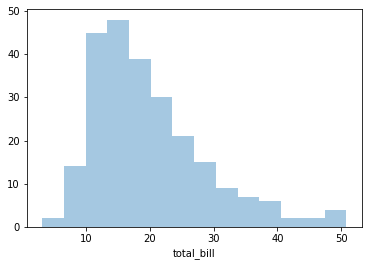

In [12]:
# histogram
sns.distplot(tips['total_bill'], kde=False)

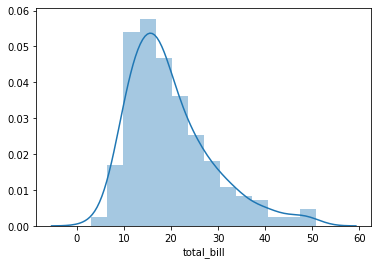

In [13]:
# kde
sns.distplot(tips['total_bill'])

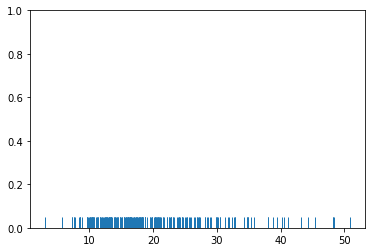

In [14]:
# rugplot
sns.rugplot(tips['total_bill'])

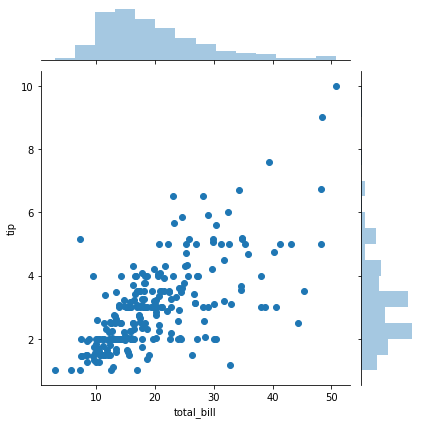

In [15]:
# joint distributions
sns.jointplot(x='total_bill', y='tip', data=tips)

## Boxplots and Violinplots

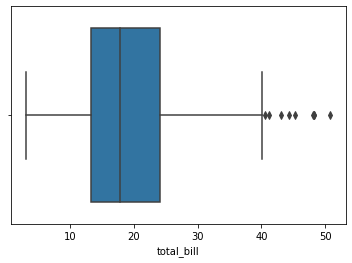

In [16]:
sns.boxplot(x='total_bill', data=tips)

In [17]:
stats = tips.describe()
stats

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [18]:
IQR = stats.loc['75%','total_bill'] - stats.loc['25%','total_bill']

In [19]:
# upper whisker
right_whisker = 1.5*IQR + stats.loc['75%','total_bill']
right_whisker

40.29749999999999

In [20]:
# lower whisker
left_whisker = stats.loc['25%','total_bill'] - 1.5*IQR
left_whisker
# -> end of whisker at min of dataset

-2.8224999999999945

In [21]:
# compute outliers to the right
tips[tips['total_bill'] > right_whisker].sort_values(by='total_bill')


,total_bill,tip,sex,smoker,day,time,size
184,40.55,3.00,Male,Yes,Sun,Dinner,2
142,41.19,5.00,Male,No,Thur,Lunch,5
197,43.11,5.00,Female,Yes,Thur,Lunch,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3


## Boxplots splitted by one categorical Variable

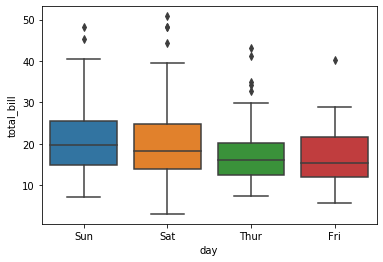

In [22]:
sns.boxplot(x='day', y='total_bill', data=tips)

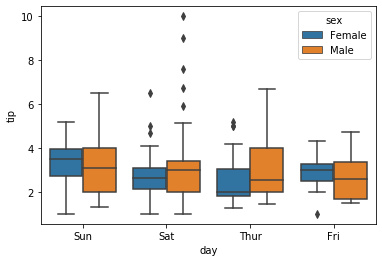

In [23]:
sns.boxplot(x='day', y='tip', hue='sex', data=tips)

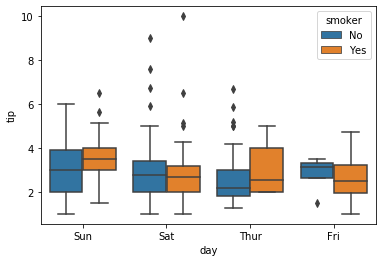

In [24]:
sns.boxplot(x='day', y='tip', hue='smoker', data=tips)

Boxplots are nice, but the actual shape of the distribution is hidden. Solution:

## Violinplots

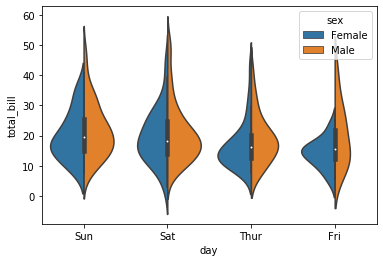

In [25]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

### Nice Summary Plots

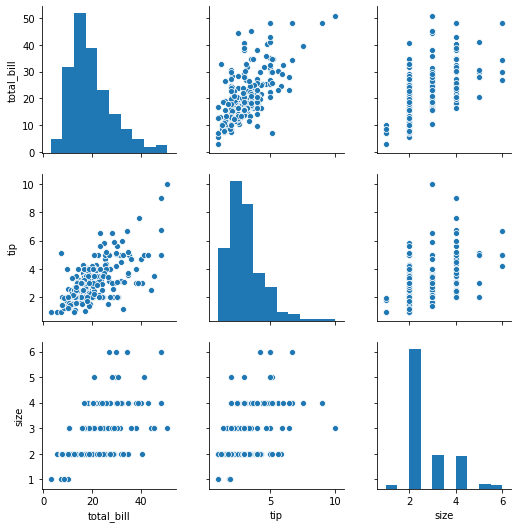

In [26]:
sns.pairplot(data=tips)

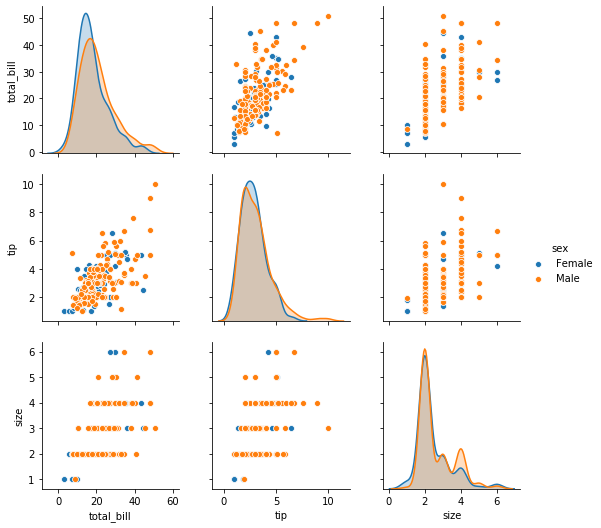

In [27]:
sns.pairplot(data=tips, hue='sex')

**There are many more types of plots. You will learn some of them during the exercise.**

https://seaborn.pydata.org/